In [269]:
import pandas as pd
import os
import dotenv
import seaborn as sns
import matplotlib.pyplot as plt
import sqlalchemy
import humanize as hum
import numpy as np

In [270]:
pd.set_option('display.max_columns', None)

# - Esame finale del modulo Python W12D4

### - Importo il file COVID-19 dataset dalla fonte "https://github.com/owid/covid-19-data/tree/master/public/data"

In [271]:
path = r"C:\Users\david\OneDrive\Desktop\EPICODE\MODULO 3 - Python\owid-covid-data.csv"
df = pd.read_csv(path)

In [286]:
df["date"] = pd.to_datetime(df["date"])

In [288]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
130729,FRA,Europe,France,2021-01-01,2338258.0,0.0,11984.000,63534.0,0.0,445.571,36377.600,0.000,186.442,988.434,0.00,6.932,1.09,2609.0,38.473,24263.0,357.793,1173.0,17.298,7344.0,108.298,35914568.0,33230.0,532.683,0.493,257782.0,3.823,0.050,20.0,people tested,3826.0,3822.0,4.0,NaN,1201.0,642.0,0.01,0.01,0.00,NaN,9.0,641.0,0.001,63.89,122.578,42.0,19.718,13.079,38605.671,NaN,86.060,4.77,30.1,35.6,NaN,5.98,82.66,0.901,67813000,NaN,NaN,NaN,NaN
130730,FRA,Europe,France,2021-01-02,2338258.0,0.0,11984.000,63534.0,0.0,445.571,36377.600,0.000,186.442,988.434,0.00,6.932,1.09,2632.0,38.813,24458.0,360.668,1173.0,17.298,7477.0,110.259,36144513.0,229945.0,536.094,3.411,258808.0,3.839,0.052,19.2,people tested,4200.0,4192.0,8.0,NaN,374.0,597.0,0.01,0.01,0.00,NaN,9.0,596.0,0.001,63.89,122.578,42.0,19.718,13.079,38605.671,NaN,86.060,4.77,30.1,35.6,NaN,5.98,82.66,0.901,67813000,NaN,NaN,NaN,NaN
130731,FRA,Europe,France,2021-01-03,2427206.0,88948.0,12706.857,66449.0,2915.0,416.429,37761.414,1383.814,197.688,1033.785,45.35,6.479,1.10,2665.0,39.299,24780.0,365.417,1167.0,17.209,7545.0,111.262,36191680.0,47167.0,536.793,0.700,258688.0,3.837,0.052,19.2,people tested,4619.0,4611.0,8.0,NaN,419.0,572.0,0.01,0.01,0.00,NaN,8.0,571.0,0.001,63.89,122.578,42.0,19.718,13.079,38605.671,NaN,86.060,4.77,30.1,35.6,NaN,5.98,82.66,0.901,67813000,47362.797,7.68,11.25,733.9491
130732,FRA,Europe,France,2021-01-04,2427206.0,0.0,12706.857,66449.0,0.0,416.429,37761.414,0.000,197.688,1033.785,0.00,6.479,1.12,2657.0,39.181,24962.0,368.101,1184.0,17.460,7590.0,111.925,36619264.0,427584.0,543.135,6.342,262958.0,3.900,0.054,18.5,people tested,6776.0,6763.0,13.0,NaN,2157.0,778.0,0.01,0.01,0.00,NaN,11.0,777.0,0.001,63.89,122.578,42.0,19.718,13.079,38605.671,NaN,86.060,4.77,30.1,35.6,NaN,5.98,82.66,0.901,67813000,NaN,NaN,NaN,NaN
130733,FRA,Europe,France,2021-01-05,2427206.0,0.0,12706.857,66449.0,0.0,416.429,37761.414,0.000,197.688,1033.785,0.00,6.479,1.14,2616.0,38.577,24871.0,366.759,1178.0,17.371,7710.0,113.695,36963435.0,344171.0,548.240,5.105,259828.0,3.854,0.056,17.9,people tested,14576.0,14557.0,19.0,NaN,7800.0,1837.0,0.02,0.02,0.00,NaN,27.0,1834.0,0.003,63.89,122.578,42.0,19.718,13.079,38605.671,NaN,86.060,4.77,30.1,35.6,NaN,5.98,82.66,0.901,67813000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363308,ESP,Europe,Spain,2021-12-27,6100138.0,0.0,70149.429,91275

## - 1) Si richiede di verificare le dimensioni del dataset e i relativi metadati

In [6]:
num_righe = df.shape[0]
num_colonne = df.shape[1]
print(f"Il Dataframe ha {num_righe} righe e {num_colonne} colonne")

Il Dataframe ha 429435 righe e 67 colonne


In [7]:
colonne = df.columns
print("Le colonne del Dataframe sono:\n")
for colonna in colonne:
    print(colonna)

Le colonne del Dataframe sono:

iso_code
continent
location
date
total_cases
new_cases
new_cases_smoothed
total_deaths
new_deaths
new_deaths_smoothed
total_cases_per_million
new_cases_per_million
new_cases_smoothed_per_million
total_deaths_per_million
new_deaths_per_million
new_deaths_smoothed_per_million
reproduction_rate
icu_patients
icu_patients_per_million
hosp_patients
hosp_patients_per_million
weekly_icu_admissions
weekly_icu_admissions_per_million
weekly_hosp_admissions
weekly_hosp_admissions_per_million
total_tests
new_tests
total_tests_per_thousand
new_tests_per_thousand
new_tests_smoothed
new_tests_smoothed_per_thousand
positive_rate
tests_per_case
tests_units
total_vaccinations
people_vaccinated
people_fully_vaccinated
total_boosters
new_vaccinations
new_vaccinations_smoothed
total_vaccinations_per_hundred
people_vaccinated_per_hundred
people_fully_vaccinated_per_hundred
total_boosters_per_hundred
new_vaccinations_smoothed_per_million
new_people_vaccinated_smoothed
new_peopl

## - 2) Si chiede di trovare, per ogni continente:

### - Il numero di casi fin dall'inizio della pandemia

In [36]:
# Innanzitutto per effettuare questa analisi ripulisco il dataframe da tutte le righe che non contengono un valore nella colonna "total_cases"
tot_casi = df[df["total_cases"] > 0] 


In [37]:
# Piccola prova per trovare il numero di casi in Europa. La mia intenzione è quella di automatizzare questa ricerca con un ciclo for
tot_casi_europa = tot_casi[tot_casi["location"] == "Europe"]
tot_casi_europa = int(tot_casi_europa["total_cases"].max())
tot_casi_europa = hum.intword(tot_casi_europa)
tot_casi_europa

'252.9 million'

In [79]:
continent = ["Europe", "Africa", "Cina", "Oceania", "North America", "South America"] #inizializzo la lista di continenti
casi_per_continente = {}
tot_casi = df
for paese in tot_casi["location"].unique(): # il ciclo cerca i paesi all'interno della lista di paesi univoci nel dataframe
    tot_casi = df[df["total_cases"] > 0] # prendo solo le righe dove il totale dei casi è maggiore di 0 (quindi non nullo)
    if paese in continent: # se il paese si trova nella lista continent (e quindi se è un continente)
        tot_casi = tot_casi[tot_casi["location"] == paese] #prendo solo le righe in cui la location è uguale al continente (Es. se trovo Europe prendo solo le righe in cui si trova Europe
        num_casi = int(tot_casi["total_cases"].max()) # il num_casi è il numero massimo di quelle righe
        # print(f"{paese}: {num_casi}") #stampo il numero associato al continente
        casi_per_continente[paese] = num_casi # aggiungo la chiave e il valore all'interno di un dizionario 

In [80]:
# Creo un dataframe con i dati del dizionario create con il procedente codice:
casi_per_continente = pd.DataFrame(list(casi_per_continente.items()), columns=['Continenti', 'Tot_casi'])

In [87]:
# Dataframe contenente la risposta alla domanda tot casi per continente dall'inizio della pandemia
casi_per_continente

,Continenti,Tot_casi
0,Africa,13145380
1,Europe,252916868
2,North America,124492666
3,Oceania,15003352
4,South America,68809418


### - la percentuale rispetto al totale mondiale del numero di casi

In [84]:
#rendo interi i valori della colonna Tot_casi, in quanto objects
casi_per_continente["Tot_casi"] = casi_per_continente["Tot_casi"].astype(int) 

In [86]:
casi_per_continente.dtypes

Continenti    object
Tot_casi       int32
dtype: object

In [98]:
casi_per_continente

,Continenti,Tot_casi
0,Africa,13145380
1,Europe,252916868
2,North America,124492666
3,Oceania,15003352
4,South America,68809418


In [91]:
tot_casi_mondo = casi_per_continente["Tot_casi"].sum()
print(f"Numero totale di casi nel mondo: {hum.intcomma(tot_casi_mondo)}")

Numero totale di casi nel mondo: 474,367,684


In [133]:
# voglio rispondere alla domanda con un ciclo for che per ogni numero presente nella colonna "Tot_casi" nel Dataframe casi_per_continente
# calcoli la percentuale rispetto al totale
percentuale = [] #inizializzo la lista percentuale
for numero in casi_per_continente["Tot_casi"]: # per ogni numero nella colonna Tot_casi
    casi = 0 
    casi = round(numero/tot_casi_mondo * 100) # calcolo la percentuale dei casi rispetto al totale ("tot_casi_mondo") e la arrotondo a numero intero
    percentuale.append(casi) # aggiungo la percentuale appena trovata alla lista "percentuale"
casi_per_continente["% rispetto al totale"] = percentuale # aggiungo la lista al Dataframe casi_per_continente che verrà letta come valori e come etichetta di colonna "% rispetto al totale"

In [150]:
# Questo è il Dataframe che risponde ad entrambe le prime domande
casi_per_continente

,Continenti,Tot_casi,% rispetto al totale
0,Africa,13145380,3
1,Europe,252916868,53
2,North America,124492666,26
3,Oceania,15003352,3
4,South America,68809418,15


## - 3) Selezionare i dati relativi all'Italia nel 2022 e, poiché i nuovi casi vengono registrati settimanalmente, filtrare via i giorni che non hanno misurazioni

In [153]:
df['date'] = pd.to_datetime(df['date']) # cambio il tipo di dato nella colonna dtype da object a datetime

In [ ]:
filtro =  ((df["location"] == "Italy") & (df["date"].dt.year == 2022))
df_italia_2022 = df[filtro] #filtro il Dataframe per nazione e data
df_italia_2022['new_cases'].replace(0, np.nan, inplace=True) #sostituisco il valore 0 in NaN (np.nan)
df_italia_2022.dropna(subset=['new_cases'], inplace=True) # eliminno i valori NaN dalla colonna "new_cases"

### - Mostrare con un grafico adeguato l'evoluzione dei casi totali dall'inizio alla fine dell'anno

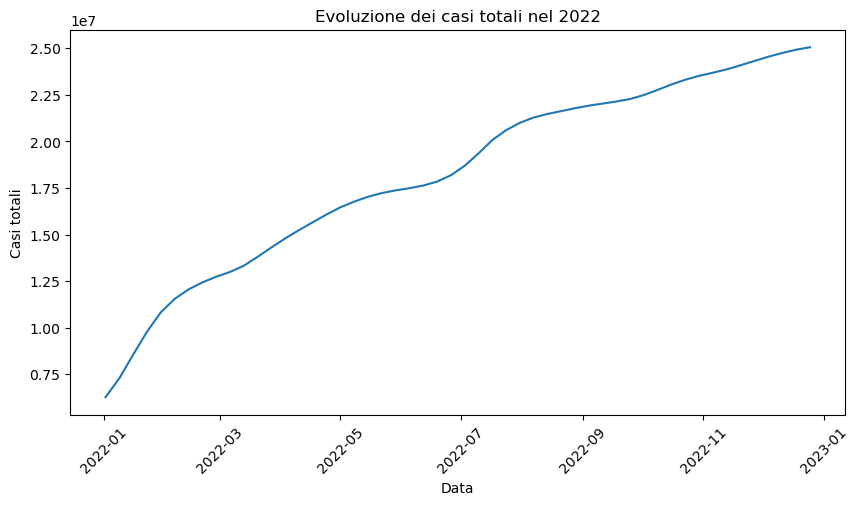

In [201]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
plt.xlabel("Data")
plt.ylabel("Casi totali")
plt.title("Evoluzione dei casi totali nel 2022")
sns.lineplot(data=df_italia_2022, x="date", y="total_cases")
plt.show()

### - Il numero di nuovi casi rispetto alla data

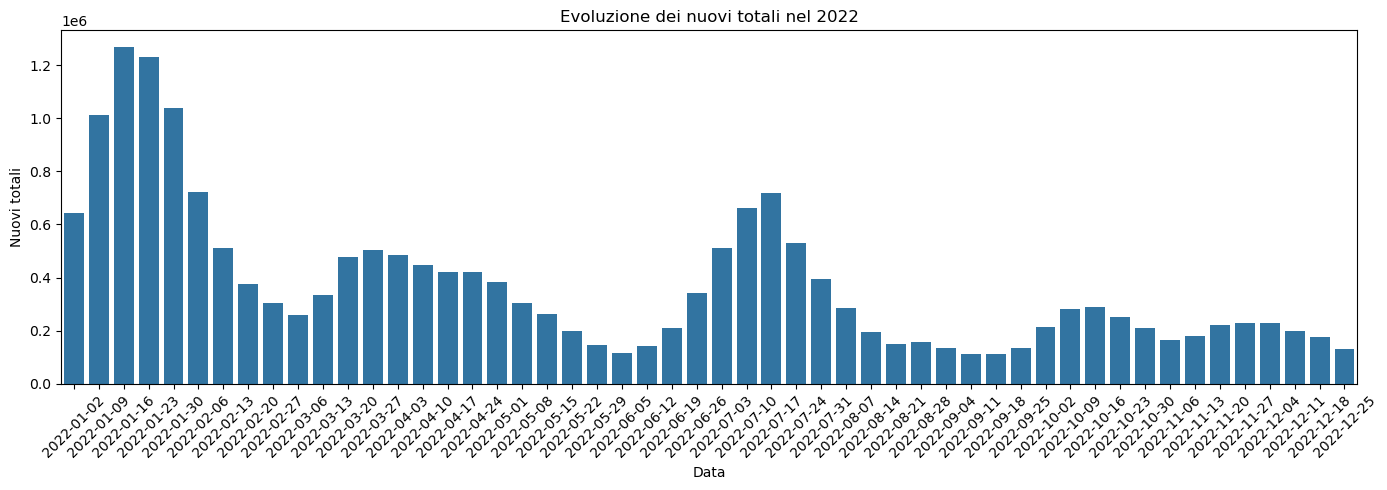

In [199]:
plt.figure(figsize=(14,5))
plt.xticks(rotation=45)
plt.xlabel("Data")
plt.ylabel("Nuovi totali")
plt.title("Evoluzione dei nuovi totali nel 2022")
sns.barplot(data=df_italia_2022, x="date", y="new_cases")
plt.tight_layout()
plt.show()

## - 4) Riguardo le nazioni di Italia, Germania e Francia:

### - Mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU, considerare quindi la colonna 'icu_patients') da maggio 2022 (incluso) ad aprile 2023 (incluso)

In [254]:
filtro = ((df["location"] == "Italy") | (df["location"] == "Germany") | (df["location"] == "France"))
df_Ita_Ger_Fra = df[filtro] # creo un Dataframe contente solo i dati delle nazioni: Italia, Germania e Francia

In [ ]:
df_Ita_Ger_Fra["date"] = pd.to_datetime(df_Ita_Ger_Fra["date"]) # converto il tipo di dati nella colonna "date" da object a datetime

In [260]:
df_Ita_Ger_Fra = df_Ita_Ger_Fra[["location", "date", "icu_patients"]] #prendo esclusivamente le colonne che mi serviranno

In [262]:
filtro2 = ((df_Ita_Ger_Fra["date"] >= "2022-05-01") & (df_Ita_Ger_Fra["date"] <= "2023-04-30"))
df_Ita_Ger_Fra = df_Ita_Ger_Fra[filtro2] #applico il secondo filtro alle date, imposto le condizioni chieste nella domanda

In [263]:
df_Ita_Ger_Fra = df_Ita_Ger_Fra[["location", "date", "icu_patients"]].dropna() # Elimino i valori nulli all'interno del Dataframe, non utili al fine dell'analisi

Text(0, 0.5, 'ICU')

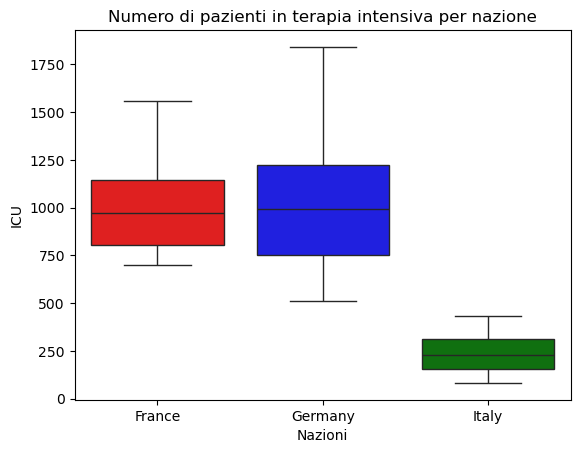

In [265]:
#Creo il grafico "numero di pazienti in terapia intensiva per nazione"
sns.boxplot(data=df_Ita_Ger_Fra, x="location", y="icu_patients", hue="location", palette=["red", "blue", "green"], legend=False)
plt.title("Numero di pazienti in terapia intensiva per nazione")
plt.xlabel("Nazioni")
plt.ylabel("ICU")

### - Scrivere un breve commento (una o due righe) riguardo che conclusioni possiamo trarre osservando il grafico risultante

### Dal grafico risulta palese come i dati relativi alle terapie intensive in Italia siano state molto più basse rispetto a Francia e alla Germania.
### le ragioni di questo notevole dato posso essere molteplici: Una prevenzione migliore? un senso di responsabilità più grande da parte degli infetti? 
### Governo più reattivo? o magari sistema sanitario inadeguato a numeri maggiori? quindi quelli sono stati il nostro "massimale sanitario"
### Lascio aperta la questione per ulteriori approfondimenti

## -5) Riguardo le nazioni di Italia, Germania, Francia e Spagna in tutto il 2021:


### - mostrare, in maniera grafica oppure numerica, la somma dei pazienti ospedalizzati per ogni nazione (colonna hosp_patients)

In [276]:
filtro = ((df["location"] == "Italy") | (df["location"] == "Germany") | (df["location"] == "France") | (df["location"] == "Spain"))
df = df[filtro] # imposto il filtro sulla lacation, e mi prendo solo le nazioni interessate

In [300]:
filtro2 = (df["date"] >= "2021-01-01") & (df["date"] <= "2021-12-31")
df = df[filtro2] #imposto la condizione della data affinché sia solo il 2021 l'anno interessato
df

,date,location,hosp_patients,weekly_hosp_admissions
130729,2021-01-01,France,24263.0,7344.0
130730,2021-01-02,France,24458.0,7477.0
130731,2021-01-03,France,24780.0,7545.0
130732,2021-01-04,France,24962.0,7590.0
130733,2021-01-05,France,24871.0,7710.0
...,...,...,...,...
363308,2021-12-27,Spain,8024.0,7715.0
363309,2021-12-28,Spain,8580.0,8278.0
363310,2021-12-29,Spain,8916.0,8804.0
363311,2021-12-30,Spain,8982.0,9290.0


In [291]:
df = df[["date", "location", "hosp_patients", "weekly_hosp_admissions"]] # trasformo il dataframe e tengo solo le collonne che mi interessano

In [293]:
#Dando un'occhiata ai dati presenti nasce un tema in questa domanda, a parer mio:
#I dati numerici presenti nella colonna "hosp_patients" sono valori stock, quindi mi dicono quanti pazienti c'erano in ospedale in totale
#un determinato giorno, quindi sommarli tra loro sarebbe errato, perché sommerei dei pazienti già contati, con ogni probabilità.
#Quindi ha molto più senso determinare una media dei pazienti presenti in ospedale giornalmente, oppure un'altra interpretazione potrebbe essere quella di utilizzare la
#colonna "weekly_hosp_admissions" per capire quanti pazienti sono stati ospedalizzati nel 2021.

In [305]:
media_osp = df.groupby("location")["hosp_patients"].mean().round() # faccio la media dei pazienti ospedalizzati giornalieri per nazione
media_osp

location
France     16462.0
Germany        NaN
Italy      12109.0
Spain       6607.0
Name: hosp_patients, dtype: float64

In [298]:
# la Germania non presenta tali dati

In [ ]:
#Calcolo una stima di pazienti ospedalizzati giornalmente e creo una nuova colonna chiamata "daily_hosp_admissions_estimate"
df["daily_hosp_admissions_estimate"] = df["weekly_hosp_admissions"].diff()
df["daily_hosp_admissions_estimate"]

Text(0, 0.5, 'Media pazienti')

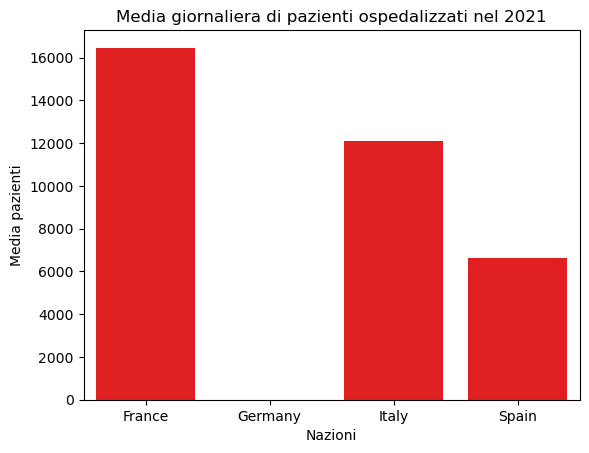

In [329]:
sns.barplot(data = media_osp, color="red")
plt.title("Media giornaliera di pazienti ospedalizzati nel 2021")
plt.xlabel("Nazioni")
plt.ylabel("Media pazienti")

Text(0, 0.5, 'Stima di pazienti ospedalizzati giornalmente')

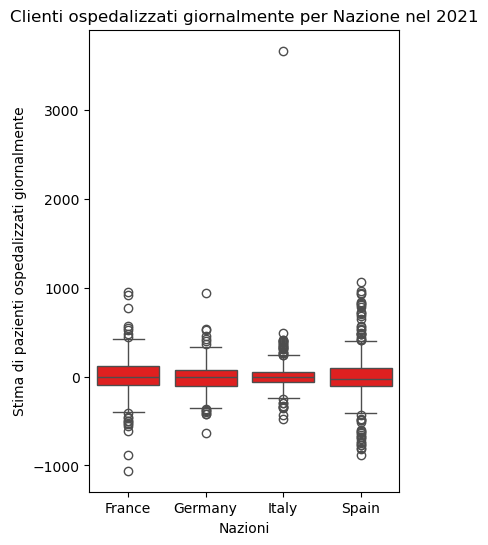

In [330]:
plt.figure(figsize=(4,6))
sns.boxplot(data = df, x="location", y="daily_hosp_admissions_estimate", color="red")
plt.title("Clienti ospedalizzati giornalmente per Nazione nel 2021")
plt.xlabel("Nazioni")
plt.ylabel("Stima di pazienti ospedalizzati giornalmente")